In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gqMcROQcJVNBKc69oeGr8z8K4Ih_DDQlUqez74HatgfF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'onlinefooddataanalysis-donotdelete-pr-bbfvida34ot4du'
object_key = 'onlinefoods.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)



,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [2]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [3]:
df_1.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_1['Age'].value_counts()

23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

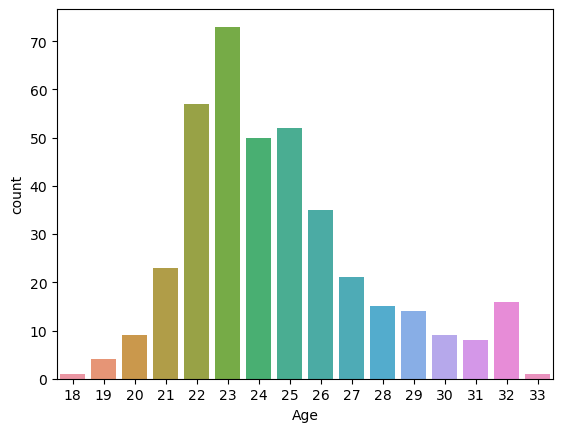

In [6]:
sns.countplot(x=df_1['Age'])

<Axes: xlabel='Occupation', ylabel='count'>

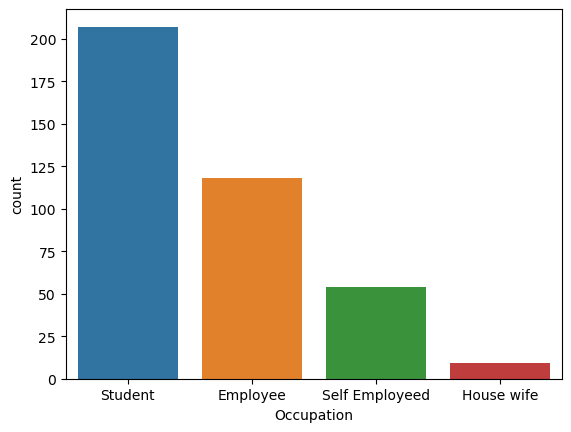

In [7]:
sns.countplot(x=df_1['Occupation'])

([<matplotlib.patches.Wedge at 0x7f5bde650640>,
 [Text(0.9133776503887026, 0.6129773794932513, '20'),
  Text(-0.08008822097488666, 1.097080615479591, '24'),
  Text(-0.8982199763471636, 0.634981002937018, '22'),
  Text(-1.075714859032977, -0.22986418175884307, '27'),
  Text(-0.6848436811978388, -0.8608072561981533, '23'),
  Text(-0.22114711378124097, -1.0775406971739987, '21'),
  Text(0.16855806538417853, -1.0870088217645444, '28'),
  Text(0.4818522745293215, -0.9888469980390897, '25'),
  Text(0.7123588120752329, -0.8381795290143773, '32'),
  Text(0.8878198449348412, -0.6494427788033945, '30'),
  Text(0.9927158709635424, -0.4738303488983114, '31'),
  Text(1.051004931184046, -0.32463615730047585, '26'),
  Text(1.0856083436474135, -0.17735423367689698, '18'),
  Text(1.0976930942119398, -0.07120302605520117, '19'),
  Text(1.0996754904068, -0.026717331426694566, '33'),
  Text(1.0999639405690826, -0.008906708018997235, '29')])

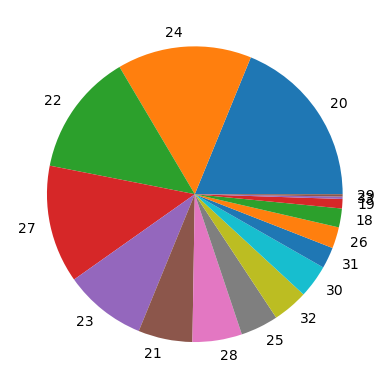

In [8]:
plt.pie(df_1['Age'].value_counts(),labels = df_1['Age'].unique())